In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
N = 3
T = 10

# True state (ẩn) ban đầu
x_true = 5.0

In [ ]:
# Particle init
particles = np.random.normal(x_true, 1.0, N)
weights = np.ones(N) / N

In [ ]:
def likelihood(z, x, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-0.5 * ((z - x) / sigma)**2)

In [ ]:
true_states = []
estimates = []

In [ ]:
for t in range(T):
    # 1. Di chuyển trạng thái thật (ẩn)
    x_true += np.random.normal(0, 1)
    z = x_true + np.random.normal(0, 1)  # quan sát

    # 2. Dự đoán particle
    particles += np.random.normal(0, 1, N)

    # 3. Cập nhật trọng số từ quan sát
    weights = likelihood(z, particles, 1.0)
    weights /= np.sum(weights)

    # 4. Ước lượng E[x]
    estimate = np.sum(particles * weights)

    # 5. Resample
    cumulative_sum = np.cumsum(weights)
    indexes = np.searchsorted(cumulative_sum, np.random.rand(N))
    particles = particles[indexes]
    weights.fill(1.0 / N)

    # Lưu kết quả
    true_states.append(x_true)
    estimates.append(estimate)

    print(f"Bước {t+1:2d}: Thật = {x_true:.2f}, Ước lượng = {estimate:.2f}, Particles = {np.round(particles, 2)}")

Bước  1: Thật = 6.52, Ước lượng = 6.16, Particles = [5.26 6.42 6.42]
Bước  2: Thật = 5.94, Ước lượng = 4.96, Particles = [4.69 5.49 4.69]
Bước  3: Thật = 6.89, Ước lượng = 6.04, Particles = [6.96 6.96 6.96]
Bước  4: Thật = 7.01, Ước lượng = 6.95, Particles = [6.36 6.36 7.9 ]
Bước  5: Thật = 6.38, Ước lượng = 6.24, Particles = [6.57 6.57 5.94]
Bước  6: Thật = 6.60, Ước lượng = 6.44, Particles = [6.72 6.72 6.72]
Bước  7: Thật = 6.06, Ước lượng = 6.47, Particles = [6.33 7.33 6.04]
Bước  8: Thật = 6.95, Ước lượng = 6.51, Particles = [6.13 6.13 6.71]
Bước  9: Thật = 8.05, Ước lượng = 7.58, Particles = [7.48 7.71 7.71]
Bước 10: Thật = 9.55, Ước lượng = 10.61, Particles = [10.85 10.85 10.85]


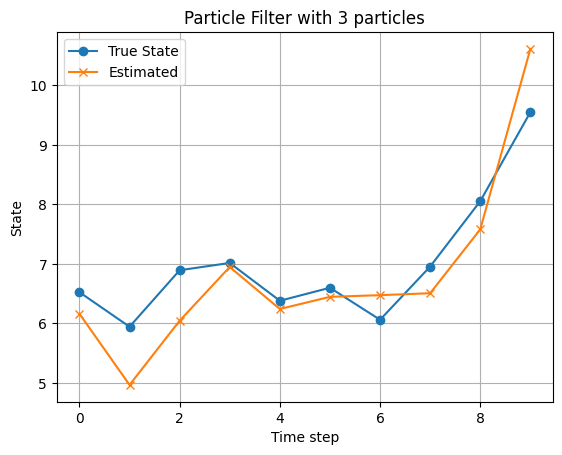

In [ ]:
plt.plot(true_states, label="True State", marker='o')
plt.plot(estimates, label="Estimated", marker='x')
plt.legend()
plt.xlabel("Time step")
plt.ylabel("State")
plt.title("Particle Filter with 3 particles")
plt.grid(True)
plt.show()